In [6]:
# %matplotlib notebook
%matplotlib inline 

import numpy as np
import os, sys

#import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dedicated_dd = np.load('dedicated_app_runtime_update1.npy').item()
dedicated_dd

{'cudasdk_BlackScholes': 1805.0,
 'cudasdk_FDTD3d': 14291.0,
 'cudasdk_MCEstimatePiInlineP': 746.667,
 'cudasdk_MCEstimatePiInlineQ': 832.333,
 'cudasdk_MCEstimatePiP': 884.333,
 'cudasdk_MCEstimatePiQ': 912.667,
 'cudasdk_MCSingleAsianOptionP': 799.0,
 'cudasdk_SobolQRNG': 961.333,
 'cudasdk_batchCUBLAS': 1106.33,
 'cudasdk_binomialOptions': 24805.1,
 'cudasdk_boxFilterNPP': 819.333,
 'cudasdk_c++11Cuda': 933.0,
 'cudasdk_c11Cuda': 933.0,
 'cudasdk_concurrentKernels': 399.1,
 'cudasdk_convolutionFFT2D': 4160.0,
 'cudasdk_convolutionSeparable': 2184.8,
 'cudasdk_convolutionTexture': 1494.67,
 'cudasdk_dct8x8': 1106.0,
 'cudasdk_dwtHaar1D': 791.333,
 'cudasdk_dxtc': 797.0,
 'cudasdk_eigenvalues': 1723.0,
 'cudasdk_fastWalshTransform': 3639.9,
 'cudasdk_interval': 2289.67,
 'cudasdk_lineOfSight': 905.333,
 'cudasdk_matrixMul': 786.0,
 'cudasdk_mergeSort': 1155.67,
 'cudasdk_quasirandomGenerator': 1498.67,
 'cudasdk_radixSortThrust': 3500.4,
 'cudasdk_reduction': 1375.0,
 'cudasdk_scalarP

In [8]:
# # dedicated runtime
# appRuntime = np.load('../simulation/dedicated_runtime/app_dedicated_rt.npy').item()
# appRuntime

### check app1 speedup when corun with other applications

In [9]:
app_speedup = {}

In [10]:
def get_app1_speedup(logFile, dedicated_dd):
    with open(logFile) as f:
        lines = f.readlines()
    
    app_speedup_list = []
    for line in lines:
        #print line
        first6char = line[:6]
        if first6char == "[test]":
            #print line
            dataline = line[6:]
            [app1, app2]= dataline.split(';')
            app1_runtime = float(app1.split(':')[1])
            app2_runtime = float(app2.split(':')[1])
            #print app1_runtime
            #print app2_runtime

            app1_name = app1.split(':')[0]
            #app2_name = app2.split(':')[0]
            #test_name = app1_name + "+" + app2_name
            #print test_name

            app1_spd = dedicated_dd[app1_name] / app1_runtime
            #app2_spd = dedicated_dd[app2_name] / app2_runtime

            #print app1_spd, app2_spd
            #test_perf_dd[test_name] = [app1_spd, app2_spd]  

            app_speedup_list.append(app1_spd)

    return app1_name, app_speedup_list


In [11]:
# my_run2log_list = [
# 'run2_log_cudasdk_batchCUBLAS',
# 'run2_log_cudasdk_binomialOptions',
# 'run2_log_cudasdk_BlackScholes',
# 'run2_log_cudasdk_boxFilterNPP',
# 'run2_log_cudasdk_c++11Cuda',
# 'run2_log_cudasdk_concurrentKernels',
# 'run2_log_cudasdk_convolutionFFT2D',
# 'run2_log_cudasdk_convolutionSeparable',
# 'run2_log_cudasdk_convolutionTexture',
# 'run2_log_cudasdk_dct8x8',
# 'run2_log_cudasdk_dwtHaar1D',
# 'run2_log_cudasdk_dxtc',
# 'run2_log_cudasdk_eigenvalues',
# 'run2_log_cudasdk_fastWalshTransform',
# 'run2_log_cudasdk_FDTD3d',
# 'run2_log_cudasdk_interval',
# 'run2_log_cudasdk_lineOfSight',
# 'run2_log_cudasdk_matrixMul',
# 'run2_log_cudasdk_MCEstimatePiInlineP',
# 'run2_log_cudasdk_MCEstimatePiInlineQ',
# 'run2_log_cudasdk_MCEstimatePiP',
# 'run2_log_cudasdk_MCEstimatePiQ'
    
# 'run2_log_cudasdk_MCSingleAsianOptionP',
# 'run2_log_cudasdk_mergeSort',
# 'run2_log_cudasdk_quasirandomGenerator',
# 'run2_log_cudasdk_radixSortThrust',
# 'run2_log_cudasdk_reduction',
# 'run2_log_cudasdk_scalarProd',
# 'run2_log_cudasdk_scan',
# 'run2_log_cudasdk_segmentationTreeThrust',
# 'run2_log_cudasdk_shflscan',
# 'run2_log_cudasdk_simpleCUBLAS',
# 'run2_log_cudasdk_simpleCUFFTcallback',
# 'run2_log_cudasdk_SobolQRNG',
# 'run2_log_cudasdk_sortingNetworks',
# 'run2_log_cudasdk_stereoDisparity',
# 'run2_log_cudasdk_threadFenceReduction',
# 'run2_log_cudasdk_transpose',
# 'run2_log_cudasdk_vectorAdd'
    
# 'run2_log_lonestar_bh',
# 'run2_log_lonestar_dmr',
# 'run2_log_lonestar_mst',
# 'run2_log_lonestar_sssp',
# 'run2_log_parboil_bfs',
# 'run2_log_parboil_cutcp',
# 'run2_log_parboil_lbm',
# 'run2_log_parboil_mriq',
# 'run2_log_parboil_sgemm',
# 'run2_log_parboil_stencil',
# 'run2_log_poly_2dconv',
# 'run2_log_poly_3dconv',
# 'run2_log_poly_3mm',
# 'run2_log_poly_atax',
# 'run2_log_poly_bicg',
# 'run2_log_poly_correlation',
# 'run2_log_poly_covariance',
# 'run2_log_poly_fdtd2d',
# 'run2_log_poly_gemm',
# 'run2_log_poly_gesummv',
# 'run2_log_poly_mvt',
# 'run2_log_poly_syr2k',
# 'run2_log_poly_syrk'
# ]

# print len(my_run2log_list)


In [12]:
# my_run2log_list = [    
# 'run2_log_rodinia_backprop',
# 'run2_log_rodinia_b+tree',
# 'run2_log_rodinia_dwt2d',
# 'run2_log_rodinia_gaussian',
# 'run2_log_rodinia_heartwall',
# 'run2_log_rodinia_hotspot',
# 'run2_log_rodinia_hybridsort',
# 'run2_log_rodinia_lavaMD',
# 'run2_log_rodinia_lud',
# 'run2_log_rodinia_needle',
# 'run2_log_rodinia_pathfinder',
# 'run2_log_shoc_lev1BFS',
# 'run2_log_shoc_lev1fft',
# 'run2_log_shoc_lev1GEMM',
# 'run2_log_shoc_lev1md5hash',
# 'run2_log_shoc_lev1reduction',
# 'run2_log_shoc_lev1sort'
# ]

# print len(my_run2log_list)

In [13]:
my_run2log_list = [
"run2_log_cudasdk_binomialOptions",
"run2_log_poly_fdtd2d",
"run2_log_poly_3mm",
"run2_log_cudasdk_scan",
"run2_log_shoc_lev1reduction",
"run2_log_cudasdk_concurrentKernels",
]

print len(my_run2log_list)

6


In [14]:
#==========================
# 
# add more plot data here
#
#==========================

for logFile in my_run2log_list:
    
    print "working on %s" %  logFile
    
    app1_name, app1_speedup_list = get_app1_speedup(logFile, dedicated_dd)
    app_speedup[app1_name] = app1_speedup_list

working on run2_log_cudasdk_binomialOptions
working on run2_log_poly_fdtd2d
working on run2_log_poly_3mm
working on run2_log_cudasdk_scan
working on run2_log_shoc_lev1reduction
working on run2_log_cudasdk_concurrentKernels


In [15]:
print "AppName\t\t\t\tMean\tMax\tMin\tSTD"
for app, speedup_list in app_speedup.iteritems():
    array = np.array(speedup_list)
    speedup_mean = np.mean(array)
    speedup_max = np.max(array)
    speedup_min = np.min(array)
    speedup_std = np.std(array)
    
    print("{0:<30}\t{1:.3f}\t{2:.3f}\t{3:.3f}\t{4:.3f}".format(app, speedup_mean, speedup_max, speedup_min, speedup_std))

AppName				Mean	Max	Min	STD
cudasdk_concurrentKernels     	0.241	0.290	0.198	0.019
cudasdk_scan                  	0.661	0.760	0.591	0.029
poly_fdtd2d                   	0.916	0.937	0.844	0.014
shoc_lev1reduction            	0.247	0.324	0.198	0.030
poly_3mm                      	0.645	0.736	0.604	0.032
cudasdk_binomialOptions       	0.944	0.963	0.934	0.005


### Plot

In [16]:
all_data = []
app_name = []

for app, speedup_list in app_speedup.iteritems():
    array = np.array(speedup_list)
    all_data.append(array)
    app_name.append(app)
    
print len(all_data)
print len(app_name)

6
6


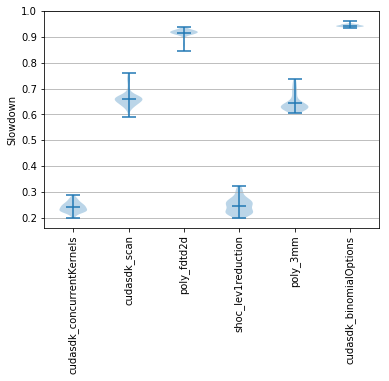

In [18]:
fig, ax = plt.subplots()

ax.violinplot(all_data, showmeans=True, showmedians=False)

ax.yaxis.grid(True)
ax.set_xticks([y+1 for y in range(len(all_data))])
# ax.set_xlabel('xlabel')
ax.set_ylabel('Slowdown')


xtick_name = [ name for name in app_name]

# add x-tick labels
plt.setp(ax, 
         xticks=[y+1 for y in range(len(all_data))])

ax.set_xticklabels(xtick_name, rotation = 90)

plt.show()


### select appliction to plot  (adjust the order)

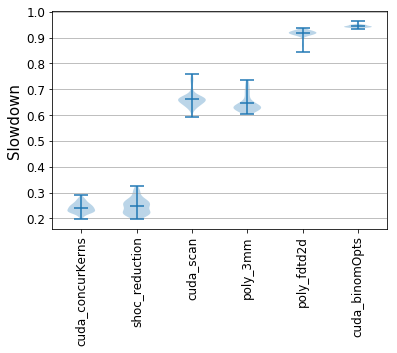

In [29]:
all_data = []
app_name = []


# [1]
all_data.append(np.array(app_speedup['cudasdk_concurrentKernels']))
app_name.append('cuda_concurKerns')

# [2]
all_data.append(np.array(app_speedup['shoc_lev1reduction']))
app_name.append('shoc_reduction')

# [3]
all_data.append(np.array(app_speedup['cudasdk_scan']))
app_name.append('cuda_scan')

# [4]
all_data.append(np.array(app_speedup['poly_3mm']))
app_name.append('poly_3mm')

# [5]
all_data.append(np.array(app_speedup['poly_fdtd2d']))
app_name.append('poly_fdtd2d')

# [6]
all_data.append(np.array(app_speedup['cudasdk_binomialOptions']))
app_name.append('cuda_binomOpts')


# plot
fig, ax = plt.subplots()
ax.violinplot(all_data, showmeans=True, showmedians=False)

ax.yaxis.grid(True)
ax.set_xticks([y+1 for y in range(len(all_data))])
ax.set_ylabel('Slowdown', fontsize=15)
xtick_name = [ name for name in app_name]
# add x-tick labels
plt.setp(ax, xticks=[y+1 for y in range(len(all_data))])
ax.set_xticklabels(xtick_name, rotation = 90)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.show()


# fig.savefig('appCorun_speedup.png', bbox_inches='tight', dpi=300)
fig.savefig('appCorun_speedup.pdf', bbox_inches='tight', dpi=300)